In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
# reading the dataset
products = pd.read_excel('E:/work/Jup/products.xlsx')

In [16]:
products.Division.value_counts()

Makeup                   1357
Body                      820
Wellness                  682
Hair Care and Styling     552
Accessories               500
Fragrance                 292
Skin Care                 242
Men Grooming              235
Electronics               152
Name: Division, dtype: int64

In [17]:
# dropping unnecessary columns
data = products.drop(['ProductId','Title','Image URL'], axis=1)

In [19]:
# imputing values with forward fill method

data['Division'].fillna(method = 'ffill', inplace=True)
data['Color'].fillna(method = 'ffill', inplace=True)

In [25]:
# converting all the text to lowercase for better operation

data = data.apply(lambda x: x.astype(str).str.lower())

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7226 entries, 0 to 7225
Data columns (total 8 columns):
Division        7226 non-null int64
Category        7226 non-null int64
Sub category    7226 non-null int64
Article type    7226 non-null int64
Offer price     7226 non-null int64
Sale price      7226 non-null int64
Color           7226 non-null int64
Gender          7226 non-null int64
dtypes: int64(8)
memory usage: 451.7 KB


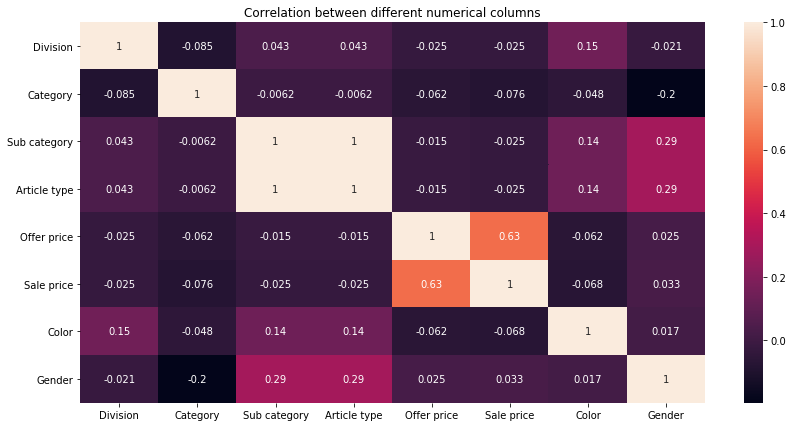

In [28]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between different numerical columns')
plt.show()

In [35]:
data_new.head()

,Division,Category,Sub category,Article type,Offer price,Sale price,Color,Gender,ProductId
0,5,27,75,75,744,568,96,1,E8AC41D107EA5DBB5DF561A684899B38
1,5,27,75,75,442,350,373,1,04AE770377AABCCBCCDD5FBC93CC83E1
2,5,27,75,75,744,568,96,1,21B0CF144B3CFFDDCCE4937C7731A7CE
3,5,27,75,75,744,568,96,1,129CE0C7596D2D346E5CDC54E55A3A67
4,5,27,75,75,322,281,422,1,A5E51E0F6C9929ECD16D875EC9A4AFA5


In [29]:
# encoding all data into numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [30]:
from sklearn.neighbors import NearestNeighbors

In [31]:
# finding 10 nearest neighbours

neighbours = NearestNeighbors(10)
neighbours.fit(data) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [32]:
neighbours.kneighbors([[5,27,75,75,744,568,96,1]], return_distance=False)

array([[ 178, 2309, 1039, 1410, 6338, 6332, 6302, 6312, 6297, 6310]],
      dtype=int64)

### Run the command below and enter a product Id, Then go to C:/User/(User_name), there you will find a csv file with name --> Top-10.csv

In [33]:
prod_Id=input('Enter Product Id:')

temp=data_new[data_new.ProductId==prod_Id]

indices = neighbours.kneighbors(X=temp.drop('ProductId',axis=1), return_distance=False)

new_df=pd.DataFrame(columns=products.columns)

for i in indices:
    new_df=new_df.append(products.iloc[i])

new_df.to_csv('Top-10.csv')
new_df

Enter Product Id:129CE0C7596D2D346E5CDC54E55A3A67


,ProductId,Title,Image URL,Division,Category,Sub category,Article type,Offer price,Sale price,Color,Gender
178,E9FA012CF69A3A722738267D3B666E3C,GlamGals 24/7 Lip Color Long Lasting Moisturis...,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Makeup,Lip Makeup,Lipstick,Lipstick,603,670,GlamGals,women
2309,9ED993B53C322FF6F83F897939050115,Iraya Relaxing Massage Oil (Prashant Taila) (1...,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Body,Body Oils,Massage Oils,Massage Oils,626,695,Iraya,women
1039,DFA2DE41D923DCE574E828044119B36B,GlamGals 3 In 1 Three Way Cake Compact Makeup+...,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Makeup,Face Makeup,Powder,Powder,630,630,GlamGals,women
1410,BDD8FD9691EC7E1E427E76D11D0C1EF9,Head & Shoulders Cool Menthol Shampoo (80 ml),"https://media6.ppl-media.com/tr:h-235,w-235,c-...",NaN,Hair Care and Styling,Shampoo,Shampoo,60,60,he,women
6338,4A8FB9607ACDD4D010A7FB0CD0ACA480,Healthvit Calvitan-Cdm Calcium + Vitamin D3 + ...,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Wellness,Vitamins & Supplements,Healthvit Vitamins & Supplements,Healthvit Vitamins & Supplements,600,700,Healthvit,women
6332,EFDFA0F7C9B73064BEB65C7C546C752A,Healthvit Melatonin 5Mg 60 Tablets,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Wellness,Vitamins & Supplements,Healthvit Vitamins & Supplements,Healthvit Vitamins & Supplements,600,700,Healthvit,women
6302,6D4C2504F6E5F01BCD66380BEF4D143E,Healthvit L-Proline 500Mg 60 Capsules,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Wellness,Vitamins & Supplements,Healthvit Vitamins & Supplements,Healthvit Vitamins & Supplements,630,700,Healthvit,women
6312,E7421B194628D498E840B0356F3A18A8,"Healthvit Jointneed-C Glucosamine, Collagen, G...","https://media6.ppl-media.com/tr:h-750,w-750,c-...",Wellness,Vitamins & Supplements,Healthvit Vitamins & Supplements,Healthvit Vitamins & Supplements,630,700,Healthvit,women
6297,E6A99F5DACDA5CDA0C7F145797FA4197,Healthvit Msm (Methylsulfonylmenthane) 1000Mg ...,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Wellness,Vitamins & Supplements,Healthvit Vitamins & Supplements,Healthvit Vitamins & Supplements,630,700,Healthvit,women
6310,98F9826EC5BF22324C227DFA11620AC2,Healthvit L-Isoleucine 500Mg 60 Capsules,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Wellness,Vitamins & Supplements,Healthvit Vitamins & Supplements,Healthvit Vitamins & Supplements,630,700,Healthvit,women
